In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\car_age_price.csv")

In [7]:
print(df.head())

   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000


In [11]:
print(df[['Year', 'Price']].isnull().sum())

Year     0
Price    0
dtype: int64


In [13]:
df = df.dropna(subset=['Year', 'Price'])

In [15]:
X = df[['Year']]
y = df['Price'] 

In [17]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): 43453.37988792974
Intercept: -87147246.05488417


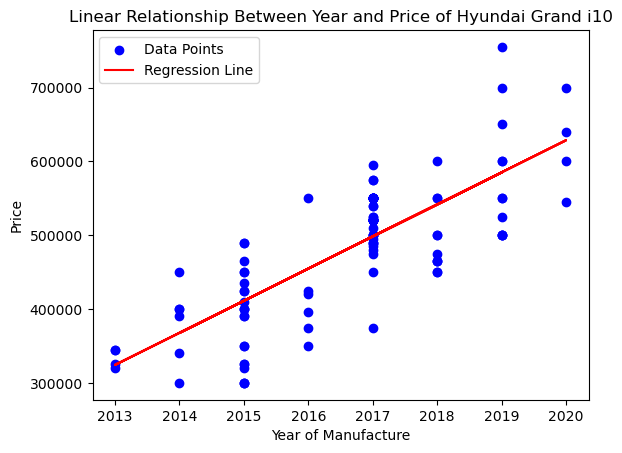

In [21]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.title('Linear Relationship Between Year and Price of Hyundai Grand i10')
plt.legend()
plt.show()

In [23]:
year_2022 = pd.DataFrame([[2022]], columns=['Year'])
predicted_price_2022 = model.predict(year_2022)
print(f"The predicted price for a 2022 model Hyundai Grand i10 is: {predicted_price_2022[0]}")

The predicted price for a 2022 model Hyundai Grand i10 is: 715488.0785097629


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [33]:
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [35]:
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

In [37]:
linear_mse = mean_squared_error(y_test, linear_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

In [39]:
print(f"Linear Regression MSE: {linear_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")

Linear Regression MSE: 4326906256.829671
Lasso Regression MSE: 4326901608.19506


In [41]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

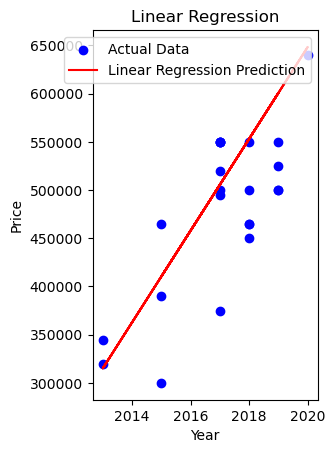

In [43]:
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, linear_pred, color='red', label='Linear Regression Prediction')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

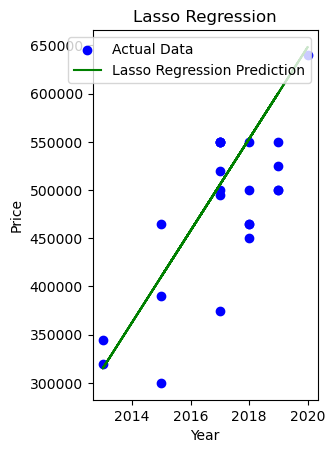

In [45]:
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, lasso_pred, color='green', label='Lasso Regression Prediction')
plt.title('Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

In [47]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# In this case, with a single feature year, the performance difference might be minimal.